In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [36]:
# Load the data
df = pd.read_csv('transformed_rainfall_data.csv')
df.head()

,Date,Vavuniya,Anuradhapura,Maha Illuppallama
0,20210101,0.0,0.0,0.0
1,20210102,2.9,0.2,0.0
2,20210103,3.4,14.2,3.8
3,20210104,15.0,7.2,19.0
4,20210105,0.0,1.1,2.8


In [37]:
#Check for null values
df.isna().sum()

Date                 0
Vavuniya             0
Anuradhapura         0
Maha Illuppallama    0
dtype: int64

In [38]:
df = pd.read_csv("transformed_rainfall_data.csv")

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

# Extract year, month, and day as features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Select features
features = ['Year', 'Month', 'Day']

print(features)

['Year', 'Month', 'Day']


In [39]:
#Check for null values
df.isna().sum()

Date                 0
Vavuniya             0
Anuradhapura         0
Maha Illuppallama    0
Year                 0
Month                0
Day                  0
dtype: int64

In [40]:
df.head()

,Date,Vavuniya,Anuradhapura,Maha Illuppallama,Year,Month,Day
0,2021-01-01,0.0,0.0,0.0,2021,1,1
1,2021-01-02,2.9,0.2,0.0,2021,1,2
2,2021-01-03,3.4,14.2,3.8,2021,1,3
3,2021-01-04,15.0,7.2,19.0,2021,1,4
4,2021-01-05,0.0,1.1,2.8,2021,1,5


In [41]:
# Define a function to train and evaluate a model for a specific target
def train_and_evaluate(df, target):
    X = df[features]
    y = df[target]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the Gradient Boosting Regressor
    gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbr.fit(X_train, y_train)
    
    # Make predictions
    y_pred = gbr.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return gbr, mae, mse, r2

# Train and evaluate models for each target
results = {}
for target in ['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']:
    model, mae, mse, r2 = train_and_evaluate(df, target)
    results[target] = {'Model': model, 'MAE': mae, 'MSE': mse, 'R2': r2}

In [42]:
# Display the results
for target, metrics in results.items():
    print(f"Results for {target}:")
    print(f"  MAE: {metrics['MAE']}")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R2: {metrics['R2']}")

Results for Vavuniya:
  MAE: 8.178337051200222
  MSE: 234.03763755668973
  R2: 0.009797863768064019
Results for Anuradhapura:
  MAE: 6.651143559761282
  MSE: 181.30703447336435
  R2: 0.08945637653553928
Results for Maha Illuppallama:
  MAE: 6.7324854046695295
  MSE: 161.62735033025368
  R2: 0.10539237281095903


In [43]:
# Load your dataset
df = pd.read_csv('transformed_rainfall_data.csv')

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

# Create additional features
df['DayOfYear'] = pd.to_datetime(df['Date'], format='%Y%m%d').dt.dayofyear
df['Month'] = pd.to_datetime(df['Date'], format='%Y%m%d').dt.month
df['Year'] = df['Date'].dt.year

df.head()

,Date,Vavuniya,Anuradhapura,Maha Illuppallama,DayOfYear,Month,Year
0,2021-01-01,0.0,0.0,0.0,1,1,2021
1,2021-01-02,2.9,0.2,0.0,2,1,2021
2,2021-01-03,3.4,14.2,3.8,3,1,2021
3,2021-01-04,15.0,7.2,19.0,4,1,2021
4,2021-01-05,0.0,1.1,2.8,5,1,2021


In [44]:
# Prepare the dataset for each station
stations = ['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']
results = {}

for station in stations:
    # Define features and target
    X = df[['Year', 'Month', 'DayOfYear']]
    y = df[station]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the GBR model with Grid Search
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0]
    }
    gbr = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    
    # Train the model
    grid_search.fit(X_train, y_train)
    
    # Predict and evaluate
    best_gbr = grid_search.best_estimator_
    y_pred = best_gbr.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[station] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }
    
    print(f'Results for {station}:')
    print(f'  MAE: {mae}')
    print(f'  MSE: {mse}')
    print(f'  R2: {r2}')
    print()

# Display the results
for station, metrics in results.items():
    print(f'{station} - MAE: {metrics["MAE"]}, MSE: {metrics["MSE"]}, R2: {metrics["R2"]}')

Results for Vavuniya:
  MAE: 8.363507418303822
  MSE: 248.5230639265922
  R2: -0.0514892876724109

Results for Anuradhapura:
  MAE: 6.674839983154519
  MSE: 191.45527648420287
  R2: 0.038490802700064775

Results for Maha Illuppallama:
  MAE: 7.067488802893692
  MSE: 176.64939072273597
  R2: 0.022245356643231795

Vavuniya - MAE: 8.363507418303822, MSE: 248.5230639265922, R2: -0.0514892876724109
Anuradhapura - MAE: 6.674839983154519, MSE: 191.45527648420287, R2: 0.038490802700064775
Maha Illuppallama - MAE: 7.067488802893692, MSE: 176.64939072273597, R2: 0.022245356643231795


In [47]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

# Create additional features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfYear'] = df['Date'].dt.dayofyear

# Create lag features and rolling mean features for each station
stations = ['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']
for station in stations:
    df[f'{station}_lag1'] = df[station].shift(1)
    df[f'{station}_lag2'] = df[station].shift(2)
    df[f'{station}_lag3'] = df[station].shift(3)
    df[f'{station}_rolling_mean3'] = df[station].rolling(window=3).mean()
    df[f'{station}_rolling_mean7'] = df[station].rolling(window=7).mean()
df.head()

,Date,Vavuniya,Anuradhapura,Maha Illuppallama,DayOfYear,Month,Year,Vavuniya_lag1,Vavuniya_lag2,Vavuniya_lag3,...,Anuradhapura_lag1,Anuradhapura_lag2,Anuradhapura_lag3,Anuradhapura_rolling_mean3,Anuradhapura_rolling_mean7,Maha Illuppallama_lag1,Maha Illuppallama_lag2,Maha Illuppallama_lag3,Maha Illuppallama_rolling_mean3,Maha Illuppallama_rolling_mean7
0,2021-01-01,0.0,0.0,0.0,1,1,2021,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-02,2.9,0.2,0.0,2,1,2021,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2021-01-03,3.4,14.2,3.8,3,1,2021,2.9,0.0,NaN,...,0.2,0.0,NaN,4.8,NaN,0.0,0.0,NaN,1.266667,NaN
3,2021-01-04,15.0,7.2,19.0,4,1,2021,3.4,2.9,0.0,...,14.2,0.2,0.0,7.2,NaN,3.8,0.0,0.0,7.600000,NaN
4,2021-01-05,0.0,1.1,2.8,5,1,2021,15.0,3.4,2.9,...,7.2,14.2,0.2,7.5,NaN,19.0,3.8,0.0,8.533333,NaN


In [52]:
# Drop the rows with NaN values created by the shift operation
df.dropna(inplace=True)

# Prepare the dataset for each station
results = {}
predictions = {}

for station in stations:
    # Define features and target
    features = ['Year', 'Month', 'DayOfYear',
                f'{station}_lag1', f'{station}_lag2', f'{station}_lag3',
                f'{station}_rolling_mean3', f'{station}_rolling_mean7']
    X = df[features]
    y = df[station]

    # Impute missing values with median
    imputer = SimpleImputer(strategy='median')
    X = imputer.fit_transform(X)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the GBR model with Grid Search
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0]
    }
    gbr = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    
    # Train the model
    grid_search.fit(X_train, y_train)
    
    # Predict and evaluate
    best_gbr = grid_search.best_estimator_
    y_pred = best_gbr.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[station] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

    predictions[station] = {
        'y_test': y_test,
        'y_pred': y_pred
    }
    
    print(f'Results for {station}:')
    print(f'  MAE: {mae}')
    print(f'  MSE: {mse}')
    print(f'  R2: {r2}')
    print()

# Display the results
for station, metrics in results.items():
    print(f'{station} - MAE: {metrics["MAE"]}, MSE: {metrics["MSE"]}, R2: {metrics["R2"]}')

Results for Vavuniya:
  MAE: 1.0400590458957992
  MSE: 7.17742435569318
  R2: 0.9353626055315369

Results for Anuradhapura:
  MAE: 1.5764182308116184
  MSE: 47.52342680949606
  R2: 0.66009858839488

Results for Maha Illuppallama:
  MAE: 1.2247444900546736
  MSE: 25.464004498421644
  R2: 0.8090501938914549

Vavuniya - MAE: 1.0400590458957992, MSE: 7.17742435569318, R2: 0.9353626055315369
Anuradhapura - MAE: 1.5764182308116184, MSE: 47.52342680949606, R2: 0.66009858839488
Maha Illuppallama - MAE: 1.2247444900546736, MSE: 25.464004498421644, R2: 0.8090501938914549


Vavuniya - MAE: 1.0400590458957992, MSE: 7.17742435569318, R2: 0.9353626055315369
Anuradhapura - MAE: 1.5764182308116184, MSE: 47.52342680949606, R2: 0.66009858839488
Maha Illuppallama - MAE: 1.2247444900546736, MSE: 25.464004498421644, R2: 0.8090501938914549


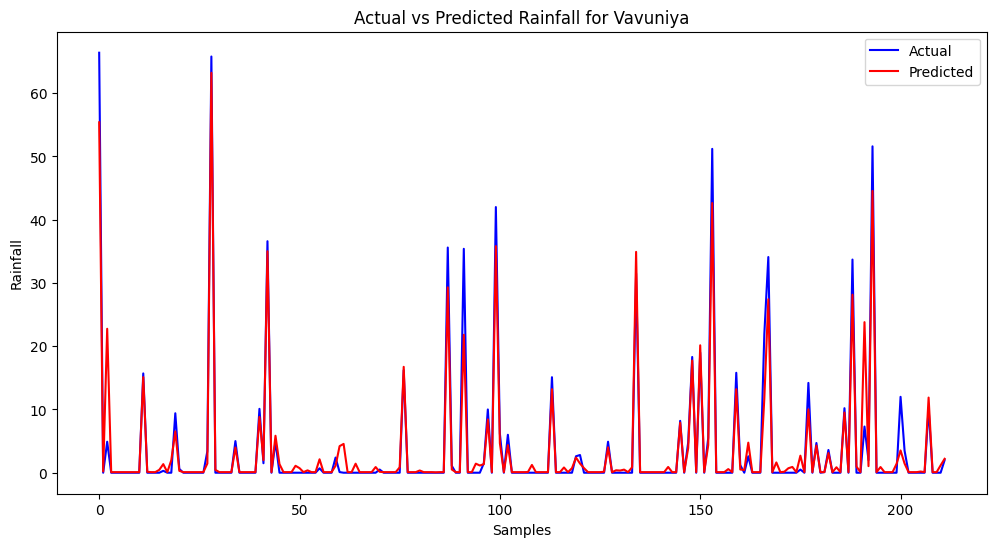

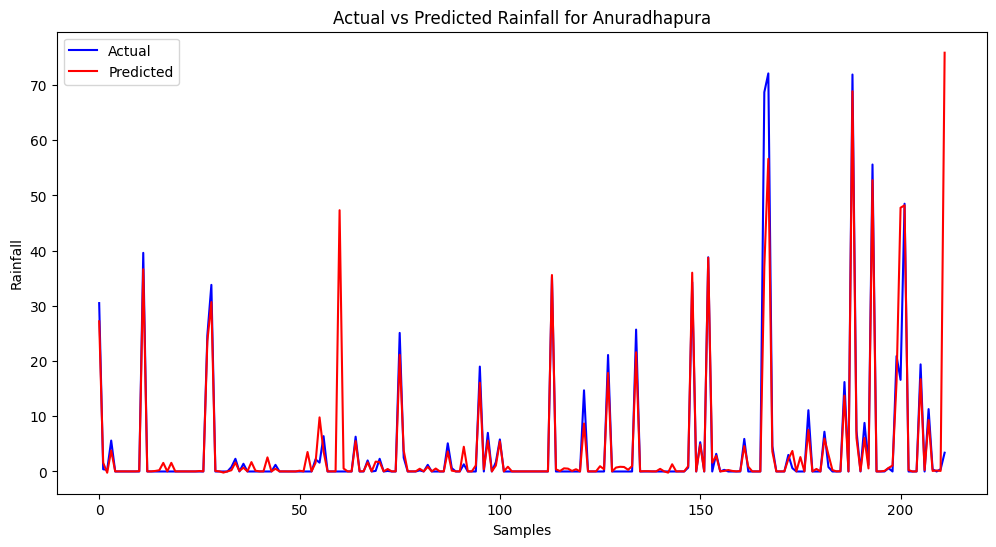

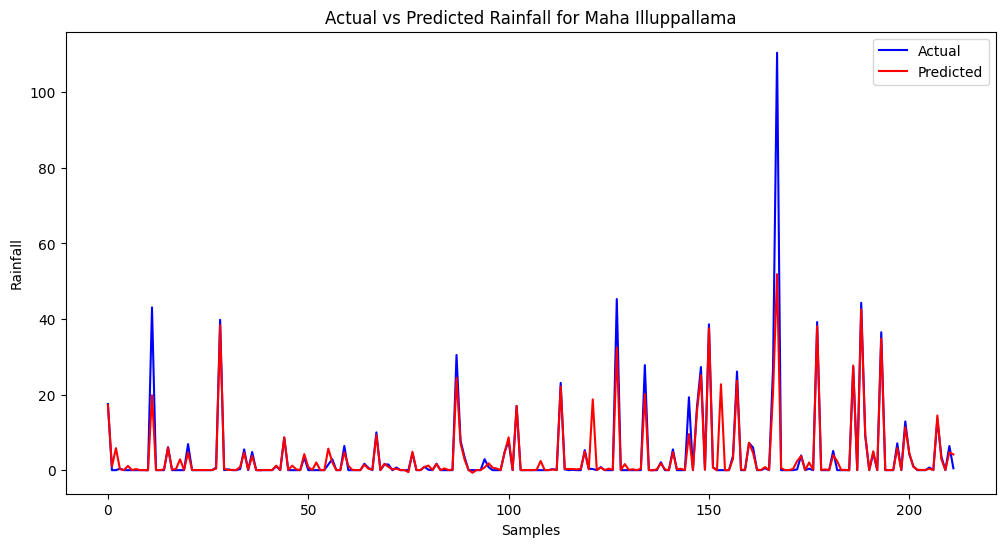

In [53]:
# Display the results
for station, metrics in results.items():
    print(f'{station} - MAE: {metrics["MAE"]}, MSE: {metrics["MSE"]}, R2: {metrics["R2"]}')
    
# Plotting the results
for station in stations:
    plt.figure(figsize=(12, 6))
    plt.plot(predictions[station]['y_test'].values, label='Actual', color='blue')
    plt.plot(predictions[station]['y_pred'], label='Predicted', color='red')
    plt.title(f'Actual vs Predicted Rainfall for {station}')
    plt.xlabel('Samples')
    plt.ylabel('Rainfall')
    plt.legend()
    plt.show()